# Lab 5

#### Yanruyu Zhu (yaz4004)

### Problem 1

#### (a) 

Generate a simulated data set with 20 observations in each of three classes (i.e. 60
observations total), and 50 variables.

In [17]:
# import library needed
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# generate data
X, y_true = make_blobs(n_samples = 60, n_features = 50, centers = 3, cluster_std = 0.60, random_state = 0)

#### (b) 

Perform K-means clustering of the observations with K = 3. How well do the clusters
that you obtained in K-means clustering compare to the true class labels (Hint: use
pd.crosstab to make a contingency table of the results)?

In [21]:
# import library needed
from sklearn.cluster import KMeans

# set the model parameter with k=3
kmeans = KMeans(n_clusters = 3) 
# fit the model
kmeans.fit(X)
# make prediction based on the model fitted
y_kmeans = kmeans.predict(X)
# make the contingency table
pd.crosstab(y_true,y_kmeans)

col_0,0,1,2
row_0,,,
0,20,0,0
1,0,20,0
2,0,0,20


#### Ans:

The K-means clustering perfectly classifies the original cluster

#### (c)

Perform K-means clustering with K = 2. Describe your results.

In [22]:
# set the model parameter with k=2
kmeans = KMeans(n_clusters = 2) 
# fit the model
kmeans.fit(X)
# make prediction based on the model fitted
y_kmeans = kmeans.predict(X)
# make the contingency table
pd.crosstab(y_true,y_kmeans)

col_0,0,1
row_0,,
0,20,0
1,0,20
2,20,0


#### Ans:

K-means algorithm classify two clusters into one cluster, because we only allows 2-means in thie case. As indicated by the contigency table, cluster 0 and 2 are both classified into cluster 0.

#### (d)

Now perform K-means clustering with K = 4 and describe your results

In [24]:
# set the model parameter with k=4
kmeans = KMeans(n_clusters = 4) 
# fit the model
kmeans.fit(X)
# make prediction based on the model fitted
y_kmeans = kmeans.predict(X)
# make the contingency table
pd.crosstab(y_true,y_kmeans)

col_0,0,1,2,3
row_0,,,,
0,20,0,0,0
1,0,20,0,0
2,0,0,12,8


#### Ans:

Since we allow the algorithm to classify an additional cluster, the algorithm clssify one of the cluster into two smaller clusters. As indicated by the contigency table, the third cluster is seperated into two clusters.

#### (e)

Perform K-means clustering with K = 3 on the data after scaling each variable to
have standard deviation one. How do these results compare to those obtained in
(c)? Explain.

In [47]:
from sklearn.preprocessing import scale

X = scale(X,with_mean = False)
print(np.std(X, axis = 0))
# set the model parameter with k=3
kmeans = KMeans(n_clusters = 3) 
# fit the model
kmeans.fit(X)
# make prediction based on the model fitted
y_kmeans = kmeans.predict(X)
# make the contingency table
pd.crosstab(y_true,y_kmeans)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


col_0,0,1,2
row_0,,,
0,20,0,0
1,0,0,20
2,0,20,0


#### Ans:



## Problem 2

Use the gene expression data in ‘Ch10Ex11.csv’. This is gene expression data that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

#### (a)

Load the data – note that there is no header so you will need to read this in without one.

In [63]:
gene = pd.read_csv('Ch10Ex11.csv',header = None)
gene = gene.T
gene.shape

(40, 1000)

#### (b)

Apply hierarchical clustering to the samples. Use all combinations of correlation and Euclidian distance with single, average and complete linkage. Plot the dendrograms. Do the genes separate the samples into the two groups? Do the results change with distance and linkage? How?

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


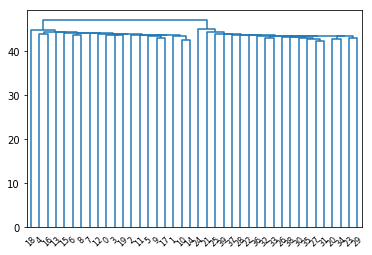

In [69]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='single')
print(cluster.fit_predict(gene))
dend = shc.dendrogram(shc.linkage(gene, method='single'))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


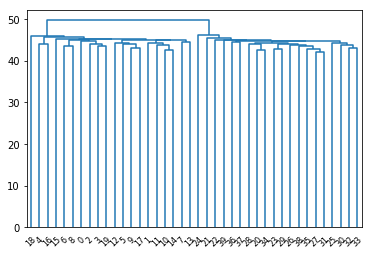

In [70]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='average')
print(cluster.fit_predict(gene))
dend = shc.dendrogram(shc.linkage(gene, method='average'))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


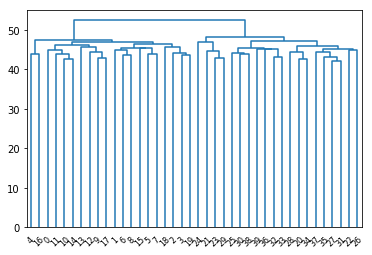

In [68]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete')
print(cluster.fit_predict(gene))
dend = shc.dendrogram(shc.linkage(gene, method='complete'))

#### Ans:

Yes, the gene seperates the samples into two groups correctly. And the result of final clustering doesn't change with different linkage. However, type of linkage does change how the lower hierarchical clustering is formed.